## **Practical session (graded session), Computational Imaging**
Objective: implement and evaluate continuous (variational) and discrete (MRF) formulations for image denoising

# Part I: Heat equation
Derive and implement the diffusion equation associated with the minimization of the regularisation energy $\int_\Omega \|\nabla u(p)\|^2dp$.

Load an image using skimage module. Test images are available at: https://homepages.cae.wisc.edu/~ece533/images/

In [1]:
## load an image
from skimage.io import imread,imshow
from PIL import Image 

original_img = imread("https://homepages.cae.wisc.edu/~ece533/images/barbara.bmp")

In [2]:
img2 = original_img.copy()

Apply a N-step diffusion process to the loaded image based on the heat equation
   Code this N-step diffusion process as a callable function using as input parameters, the image u, the numer of iterations N and a scalar parameter $α$

In [93]:
from scipy.ndimage.filters import convolve
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def computeHeatDiffusion(u,N,alpha):
    
    f = np.array([[0,1,0],[1,-4,1],[0,1,0]])

    uf = rgb2gray(u)

    for i in range(N):
        
        laplacian = convolve(rgb2gray(uf),f)

        uf = uf + alpha*laplacian
        
    return uf


Visualize the result of the diffusion on an image and highlight through an approriate visualization and/or evaluation metrics the quality of the output image.

In [5]:
image= computeHeatDiffusion(img2,30,0.2)

/homes/g18quint/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


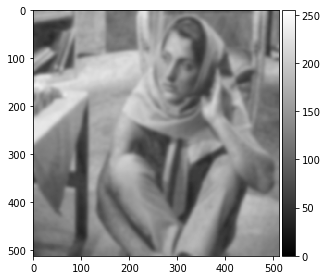

In [7]:
imshow(image, vmin=0, vmax=255,cmap='gray')

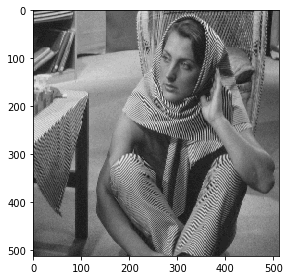

In [8]:
imshow(original_img)

# Part II: Heat equation for image denoising
Derive and implement the diffusion equation associated with image denoising according to the following cost function $\min_u \int_\Omega \| u(p)-v(p)\|^2dp+\alpha \int_\Omega \|\nabla u(p)\|^2dp$, where $v$ is a noisy image.

Load an image and generate a noisy image using an additive Gaussian noise. You can use function np.random.normal() to generate the noise.

In [5]:
img2 = original_img.copy()
noisy_image = img2 + np.random.normal(0,20,np.shape(img2))

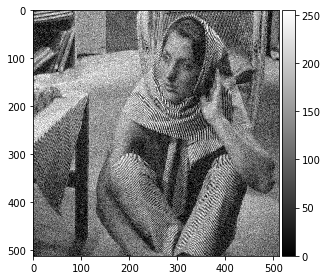

In [7]:
imshow(noisy_image, vmin=0, vmax=255,cmap='gray')

Implement a diffusion equation to solve the above minimization through a function denoisingHeatDiffusion(v,N,alpha) with v the noisy image, N the number of iterations of the diffusion, $\alpha$ the weighing factor of the regularization term and $\lambda$ the gradient step

In [109]:
def denoisingHeatDiffusion(v,N,alpha,lambda_par):

    f = np.array([[0,1,0],[1,-4,1],[0,1,0]])

    uf = rgb2gray(v)

    for i in range(N):
        
        laplacian = convolve(rgb2gray(uf),f)

        uf = uf + 2*lambda_par*((v-uf)+alpha*laplacian)
        
    return uf

Run denoising experiments and evaluate the quality of the denoising process w.r.t. the main parameters of the denoising scheme



In [12]:
output_img = denoisingHeatDiffusion(noisy_image.copy(),N=100,alpha=1,lambda_par=0.1)

/homes/g18quint/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


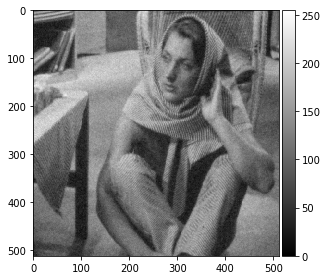

In [13]:
imshow(output_img, vmin=0, vmax=255,cmap='gray')

Illustrate through one or two examples the key properties of the diffusion  associated with this quadratic formulation

/homes/g18quint/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


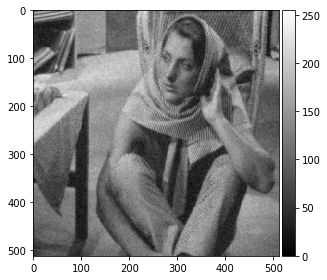

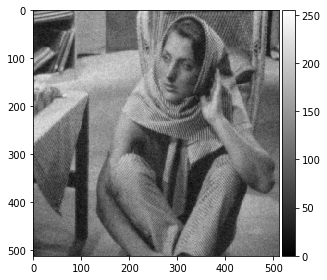

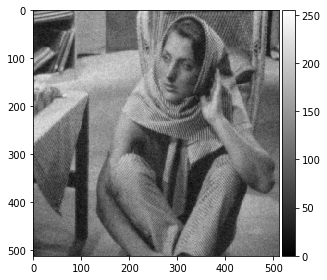

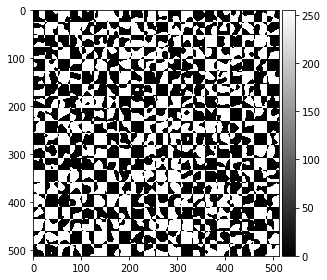

In [111]:
stepsizes = [0.01, 0.05, 0.1, 0.2]
for s in stepsizes:
    
    p = plt.figure()

    img = denoisingHeatDiffusion(noisy_image,100,1,s)
    
    imshow(img, vmin=0, vmax=255,cmap='gray')

# Part III: TV regularization
Derive and implement the diffusion equation associated with the minimization of the regularisation energy $\int_\Omega \sqrt{\epsilon + \|\nabla u(p)\|^2}dp$. We recall that for an energy $\int_\Omega \rho( \|\nabla u(p)\|^2 )dp$ the associated diffusion equation is given by:
$$ \frac{\partial u}{\partial t}= div \left ( \rho'(\|\nabla u(p)\| )  \frac{\nabla u(p)}{\|\nabla u(p)\|} \right )$$
Compare the numerical schemes derived from (i) the discretized version of the analytical expression of the diffusion operator, and (ii) the discretized version of the divergence operator applied to $\rho'(\|\nabla u(p)\| )  \frac{\nabla u(p)}{\|\nabla u(p)\|}$. 

In [87]:
def denoisingHeatDiffusionRegularizedNumerical(v,N,alpha):

    epsilon = 0.0001
    
    fx = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    fy = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

    uf = rgb2gray(v.astype(np.float64))

    for i in range(N):
        
        gx = convolve(rgb2gray(uf),fx)
        gy = convolve(rgb2gray(uf),fy)
        norm_g = np.abs(np.square(gx)+np.square(gy))
        
        rho_prim_grad = np.sqrt(norm_g)/np.sqrt(epsilon+norm_g)
        
        argx = (rho_prim_grad*gx)/(np.sqrt(norm_g)+epsilon)
        argy = (rho_prim_grad*gy)/(np.sqrt(norm_g)+epsilon)
                
        uf = uf + alpha*(convolve(argx,fx) + convolve(argy,fy))
        
    return uf

Run regularization experiments and evaluate the quality of the denoising process w.r.t. the main parameters of the regularization scheme

In [95]:
img = denoisingHeatDiffusionRegularizedNumerical(noisy_image,200,0.1)

/homes/g18quint/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


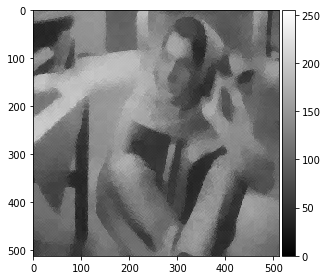

In [96]:
imshow(img, vmin=0, vmax=255,cmap='gray')

/homes/g18quint/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


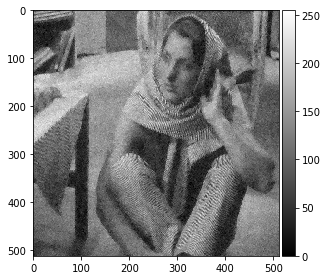

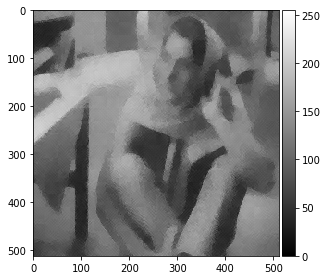

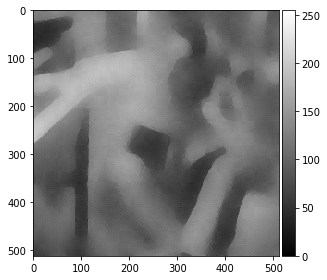

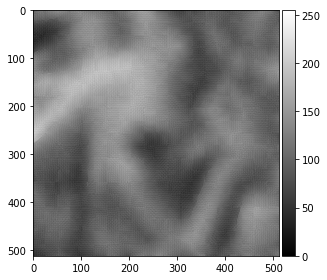

In [103]:
stepsizes = [0.05, 0.2, 0.5, 1]
for s in stepsizes:
    
    p = plt.figure()

    img = denoisingHeatDiffusionRegularizedNumerical(noisy_image,100,s)
    
    imshow(img, vmin=0, vmax=255,cmap='gray')

In [104]:
def denoisingHeatDiffusionRegularizedAnalytical(v,N,alpha):

    epsilon = 0.01
    
    fx = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    fy = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

    uf = rgb2gray(v.astype(np.float64))

    for i in range(N):
        
        gx = convolve(rgb2gray(uf),fx)
        gy = convolve(rgb2gray(uf),fy)
        norm_g = np.abs(np.square(gx)+np.square(gy))
        
        rho_prim_grad = np.sqrt(norm_g)/np.sqrt(epsilon+norm_g)
        
        dx_gx = convolve(gx,fx)
        dy_gy = convolve(gy,fy)
        
        argx = dx_gx / np.sqrt(epsilon+norm_g) - np.square(gx) * dx_gx / np.power(epsilon+norm_g,3/2)
        argy = dy_gy / np.sqrt(epsilon+norm_g) - np.square(gy) * dy_gy / np.power(epsilon+norm_g,3/2) 
        
        uf = uf + alpha*(argx+argy)
        
    return uf

In [118]:
img = denoisingHeatDiffusionRegularizedAnalytical(noisy_image,100,0.1)

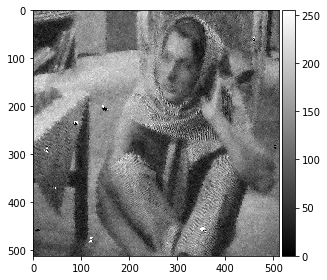

In [119]:
imshow(img, vmin=0, vmax=255,cmap='gray')

Illustrate through one or two examples the key properties of the diffusion  associated with this TV formulation

/usr/lib/python3/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in power
/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in power


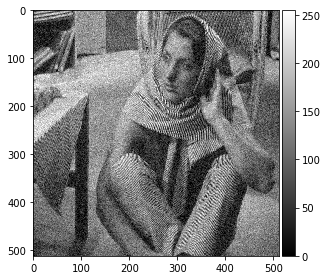

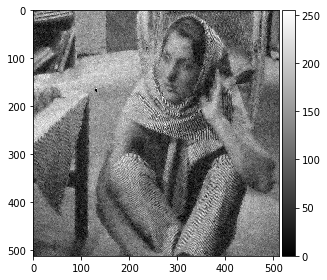

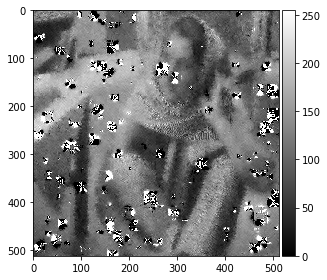

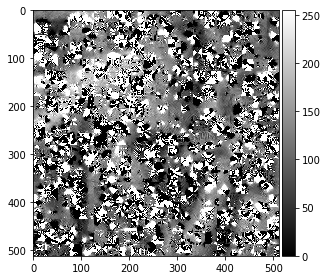

In [106]:
stepsizes = [0.001, 0.05, 0.2, 0.5]
for s in stepsizes:
    
    p = plt.figure()

    img = denoisingHeatDiffusionRegularizedAnalytical(noisy_image,100,s)
    
    imshow(img, vmin=0, vmax=255,cmap='gray')

# Part IV: TV denoising
Implement and benchmark TV denoising schemes, including a comparison to the Laplacian diffusion process.

In [81]:
def tvDenoising(v,N,alpha,alpha2):

    epsilon = 0.01
    
    fx = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
    fy = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])

    uf = rgb2gray(v.astype(np.float64))

    for i in range(N):
        
        gx = convolve(rgb2gray(uf),fx)
        gy = convolve(rgb2gray(uf),fy)
        norm_g = np.abs(np.square(gx)+np.square(gy))
        
        rho_prim_grad = np.sqrt(norm_g)/np.sqrt(epsilon+norm_g)
        
        dx_gx = convolve(gx,fx)
        dy_gy = convolve(gy,fy)
        
        argx = dx_gx / np.sqrt(epsilon+norm_g) - np.square(gx) * dx_gx / np.power(epsilon+norm_g,3/2)
        argy = dy_gy / np.sqrt(epsilon+norm_g) - np.square(gy) * dy_gy / np.power(epsilon+norm_g,3/2) 
        
        uf = uf + alpha*(argx+argy)*alpha2*(uf-v)
        
    return uf

In [84]:
img = tvDenoising(noisy_image,200,0.1,0.1)

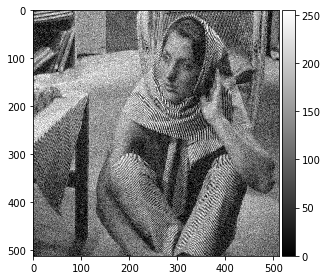

In [86]:
imshow(img, vmin=0, vmax=255,cmap='gray')

Illustrate through one or two examples the key properties of the diffusion  associated with the TV denoising

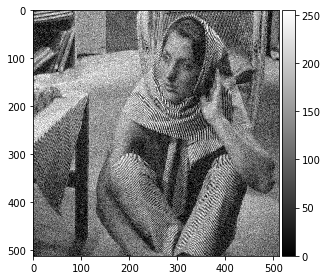

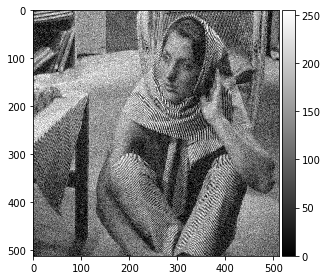

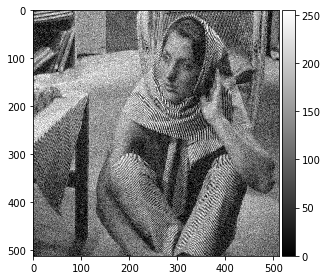

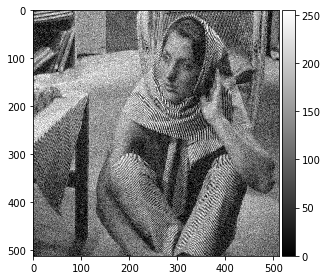

In [108]:
stepsizes = [0.2, 0.5, 1, 2]
for s in stepsizes:
    
    p = plt.figure()

    img = tvDenoising(noisy_image,100,s,s)
    
    imshow(img, vmin=0, vmax=255,cmap='gray')

# Part V: Perona-Malik diffusion (Bonus)
Implement and benchmark diffusion schemes defined as:
$$ \frac{\partial u}{\partial t}= div \left ( c(\|\nabla u(p)\| )  \nabla u(p) \right )$$
with different choices for function $c()$: $c(x)=1-exp(-x^2/K^2)$, $c(x)=\left [1+x^2/K^2\right]^{-1/2}$, $c(x)=\left [1+x^2/K^2\right]^{-1}$.

### $c(x)=1-exp(-x^2/K^2)$

In [136]:
def peronaMaliDifussion(v,N,alpha,K):
    
    fx = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])*1/6
    fy = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])*1/6

    uf = rgb2gray(v.astype(np.float64))

    for i in range(N):
        
        gx = convolve(rgb2gray(uf),fx)
        gy = convolve(rgb2gray(uf),fy)
        norm_g = np.sqrt(np.abs(np.square(gx)+np.square(gy)))
        
        c = 1 - np.exp(-np.square(norm_g)/K**2)
                
        argx = c*gx
        argy = c*gy
                
        uf = uf + alpha*(convolve(argx,fx) + convolve(argy,fy))
        
    return uf

In [137]:
img = peronaMaliDifussion(noisy_image,200,0.1,1)

/homes/g18quint/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


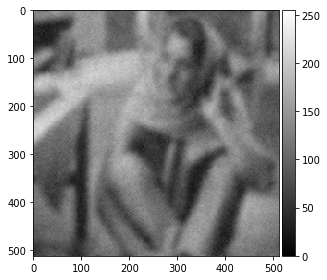

In [138]:
imshow(img, vmin=0, vmax=255,cmap='gray')

### $c(x)=\left [1+x^2/K^2\right]^{-1/2}$

In [170]:
def c2_func(x, K):
    
    epsilon = 10**(-5)
    
    return 1/np.sqrt(1-np.square(x)/K**2+epsilon)

In [159]:
def peronaMaliDifussion(v,N,alpha,K):
    
    fx = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])*1/6
    fy = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])*1/6

    uf = rgb2gray(v.astype(np.float64))

    for i in range(N):
        
        gx = convolve(rgb2gray(uf),fx)
        gy = convolve(rgb2gray(uf),fy)
        norm_g = np.sqrt(np.abs(np.square(gx)+np.square(gy)))
        
        c = c2_func(norm_g,K)
                
        argx = c*gx
        argy = c*gy
                
        uf = uf + alpha*(convolve(argx,fx) + convolve(argy,fy))
        estimator
    return uf

In [172]:
img = peronaMaliDifussion(noisy_image,100,0.1,10000)

/homes/g18quint/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


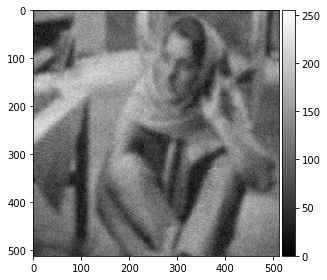

In [173]:
imshow(img, vmin=0, vmax=255,cmap='gray')

### $c(x)=\left [1+x^2/K^2\right]^{-1}$

In [174]:
def c3_func(x, K):
    
    epsilon = 10**(-5)
    
    return 1/(1-np.square(x)/K**2+epsilon)

In [175]:
def peronaMaliDifussion(v,N,alpha,K):
    
    fx = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])*1/6
    fy = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])*1/6

    uf = rgb2gray(v.astype(np.float64))

    for i in range(N):estimator
        
        gx = convolve(rgb2gray(uf),fx)
        gy = convolve(rgb2gray(uf),fy)
        norm_g = np.sqrt(np.abs(np.square(gx)+np.square(gy)))
        
        c = c3_func(norm_g,K)
                
        argx = c*gx
        argy = c*gy
                
        uf = uf + alpha*(convolve(argx,fx) + convolve(argy,fy))
        
    return uf

In [176]:
img = peronaMaliDifussion(noisy_image,100,0.1,10000)

/homes/g18quint/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


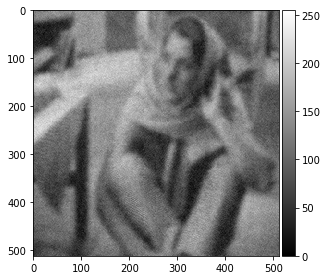

In [177]:
imshow(img, vmin=0, vmax=255,cmap='gray')

# Part VI: MRF-based image denoising
This section aims to implement and test Markov Random Field (MRF) algorithms for image denoising. Based on discretized version of variational energy:
$$ \int_\Omega \| u(p)-v(p)\|^2dp+\alpha \int_\Omega \|\nabla u(p)\|^2dp$$,
derive the observation lieklihood model $P(V|U)$ and the Markovian prior $P(U)$ of the associated MRF formulation. 
Derive an iterative denoising algorithm based on the maximization of the following posterior likelihood: $$P(U_p|V,U_q, \ q \neq p )$$
Implement this algorithm and compare to the Laplacian diffusion process.

In [42]:
from collections import deque
import math

In [69]:
Nmax = 100

fx = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
fy = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
lap_filter = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

orig_v = original_img.flatten()
u = deque(noisy_image.flatten())
N = len(orig_v)
lambd = 0.1
alpha = 2.2

for i in range(Nmax):
        
    u.rotate(-1)
    um1 = np.array(list(u))
    
    u.rotate(2)
    up1 = np.array(list(u))
    
    u.rotate(N-1)
    upN = np.array(list(u))

    u.rotate(-2*N)
    umN = np.array(list(u))
    u.rotate(N)
    u = np.array(list(u))
    
    gradient = 2*(u-orig_v)+alpha*2*(4*u-um1-up1-umN-upN)

    u = deque(u - lambd*gradient)
    
u = np.array(list(u)).reshape(int(math.sqrt(N)),int(math.sqrt(N)))

/homes/g18quint/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


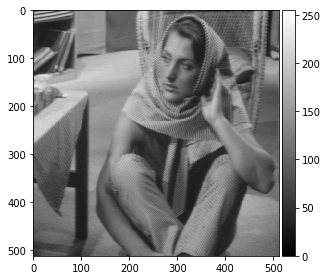

In [70]:
imshow(u, vmin=0, vmax=255,cmap='gray')

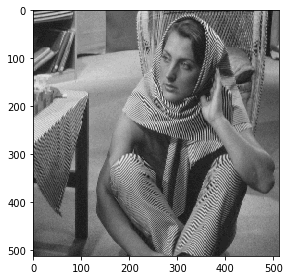

In [74]:
imshow(original_img, vmin=0, vmax=255,cmap='gray')

## We now modify the $\rho$ function

In [72]:
def rho(x):
    epsilon = 0.01
    return np.sqrt(epsilon+np.square(x))

In [73]:
Nmax = 100

fx = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
fy = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
lap_filter = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

orig_v = original_img.flatten()
u = deque(noisy_image.flatten())
N = len(orig_v)
lambd = 0.1
alpha = 2.2

for i in range(Nmax):
        
    u.rotate(-1)
    um1 = np.array(list(u))
    
    u.rotate(2)
    up1 = np.array(list(u))
    
    u.rotate(N-1)
    upN = np.array(list(u))

    u.rotate(-2*N)
    umN = np.array(list(u))
    u.rotate(N)
    u = np.array(list(u))
    
    gradient = 2*(u-orig_v)+alpha*2*((u-um1)/rho(u-um1)+(u-up1)/rho(u-up1)+(u-umN)/rho(u-umN)+(u-upN)/rho(u-upN))

    u = deque(u - lambd*gradient)
    
u = np.array(list(u)).reshape(int(math.sqrt(N)),int(math.sqrt(N)))

/homes/g18quint/.local/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


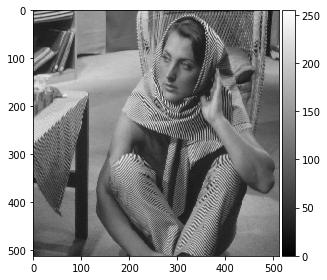

In [75]:
imshow(u, vmin=0, vmax=255,cmap='gray')

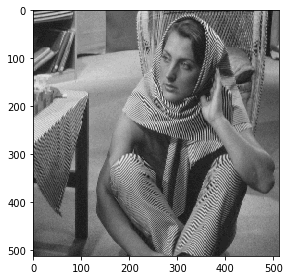

In [76]:
imshow(original_img, vmin=0, vmax=255,cmap='gray')

Bonus: Using a m-estimator instead of the quadratic prior (cf. https://hal.inria.fr/inria-00350297/document) and an reweigthed iterative least-square algorithm, implement a generalization of the above MRF formulation which accounts for a more appropriate prior than a Gaussian prior.

## M-estimator

In [192]:
m = 3
Nmax = 100

fx = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
fy = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
lap_filter = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

orig_v = original_img.flatten()
u = deque(noisy_image.flatten())
N = len(orig_v)
lambd = 0.00001
alpha = 0.1

for i in range(Nmax):
        
    u.rotate(-1)
    um1 = np.array(list(u))
    
    u.rotate(2)
    up1 = np.array(list(u))
    
    u.rotate(N-1)
    upN = np.array(list(u))

    u.rotate(-2*N)
    umN = np.array(list(u))
    u.rotate(N)
    u = np.array(list(u))
    
    gradient = m*(u-orig_v)**(m-1)+alpha*m*((u-um1)**(m-1)+(u-up1)**(m-1)+(u-umN)**(m-1)+(u-upN)**(m-1))

    u = deque(u - lambd*gradient)
    
u = np.array(list(u)).reshape(int(math.sqrt(N)),int(math.sqrt(N)))

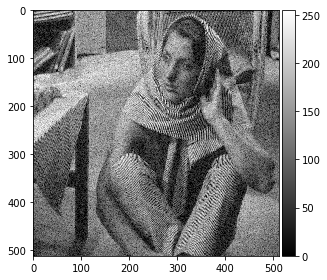

In [193]:
imshow(u, vmin=0, vmax=255,cmap='gray')